AttributeError: module 'stl.mesh' has no attribute 'Mesh3D'

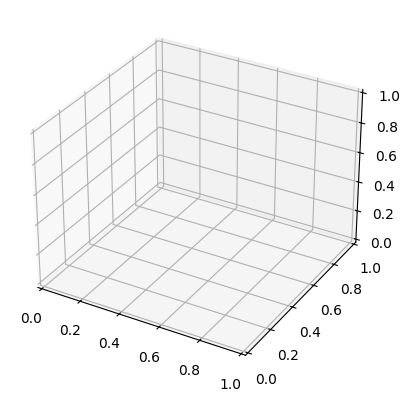

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh

# Load contacts and STL
contact_points = np.loadtxt("contact_points.txt")
stl_mesh = mesh.Mesh.from_file('robots/duplo_hip_offset_mjcf/part_1.stl')  # Replace with your STL path

scale_matrix = np.array([[1.3, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])

stl_mesh.apply_transform(scale_matrix)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot STL mesh
ax.add_collection3d(mesh.Mesh3D(stl_mesh.vectors, edgecolor='k', alpha=0.2))

# Plot contact points
ax.scatter(contact_points[:,0], contact_points[:,1], contact_points[:,2],
           c='r', marker='o', s=50, label='Contacts')

# Configure axes
all_points = np.vstack([stl_mesh.vectors.reshape(-1,3), contact_points])
min_val, max_val = np.min(all_points), np.max(all_points)
ax.set(xlim=[min_val, max_val], ylim=[min_val, max_val], zlim=[min_val, max_val],
       xlabel='X', ylabel='Y', zlabel='Z')
plt.legend()
plt.show()

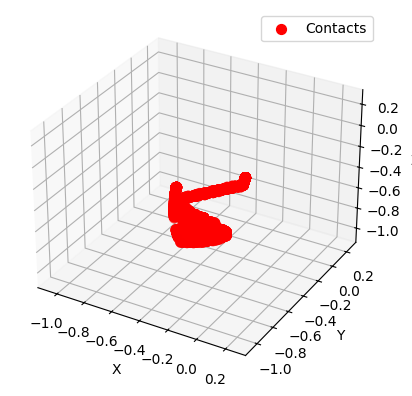

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh

# Load contacts and STL
contact_points = np.loadtxt("contact_points.txt")
# stl_mesh = mesh.Mesh.from_file('robots/duplo_hip_offset_mjcf/part_1.stl')  # Replace with your STL path

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot STL mesh
# ax.add_collection3d(mesh.Mesh3D(stl_mesh.vectors, edgecolor='k', alpha=0.2))

# Plot contact points
ax.scatter(contact_points[:,0], contact_points[:,1], contact_points[:,2],
           c='r', marker='o', s=50, label='Contacts')

# Configure axes
# all_points = np.vstack([stl_mesh.vectors.reshape(-1,3), contact_points])
all_points = contact_points
min_val, max_val = np.min(all_points), np.max(all_points)
ax.set(xlim=[min_val, max_val], ylim=[min_val, max_val], zlim=[min_val, max_val],
       xlabel='X', ylabel='Y', zlabel='Z')
plt.legend()
plt.show()

In [2]:
if []: print('[] is True')

In [13]:
import pickle

with open('contact_points.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

print(loaded_dict)

{'leg_v': {'coords': array([[-5.83345599e-07, -1.95095168e-01,  7.54220644e-01],
       [-1.54209874e-06, -1.94724403e-01,  7.52748736e-01],
       [-2.29158652e-06, -1.94432808e-01,  7.51590889e-01],
       ...,
       [-7.17606390e-08, -1.82045531e-01,  7.58202252e-01],
       [-7.18328921e-08, -1.82045529e-01,  7.58202252e-01],
       [-7.19052215e-08, -1.82045526e-01,  7.58202252e-01]],
      shape=(403, 3)), 'pos': array([ 0.14908  , -0.3625   , -0.0124026]), 'quat': array([ 0.      ,  0.      , -0.707107,  0.707107]), 'mesh': 'part_1'}, 'leg_v_2': {'coords': array([[5.32935456e-07, 1.95302080e-01, 7.54268700e-01],
       [1.49178814e-06, 1.94931290e-01, 7.52796693e-01],
       [2.24147397e-06, 1.94639647e-01, 7.51638651e-01],
       ...,
       [5.80675143e-08, 1.82240492e-01, 7.58202735e-01],
       [5.81392326e-08, 1.82240489e-01, 7.58202736e-01],
       [5.82110365e-08, 1.82240487e-01, 7.58202737e-01]], shape=(403, 3)), 'pos': array([-0.14908  , -0.3625   , -0.0124026]), 'quat

In [26]:
! openscad -o robots/duplo_hip_offset_mjcf/part_2_ascii.stl part_2.scad

from stl import mesh
import stl

# Load ASCII STL file
ascii_mesh = mesh.Mesh.from_file('robots/duplo_hip_offset_mjcf/part_2_ascii.stl')

# Save as Binary STL
ascii_mesh.save('robots/duplo_hip_offset_mjcf/part_2.stl', mode=stl.Mode.BINARY)


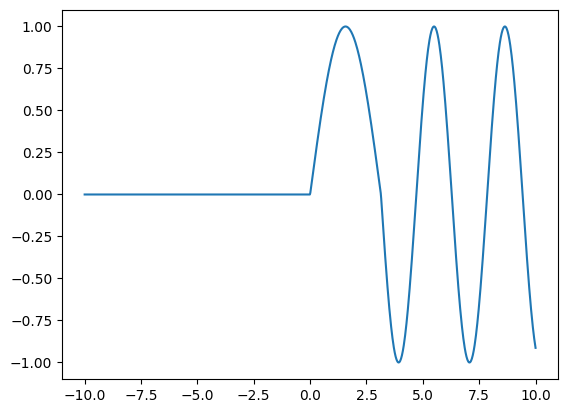

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

steady_sine = lambda w, t, t0: np.sin(w*(t-t0)) if t > t0 else 0
trans_sine = lambda w, t, t0: np.sin(w*(t-t0)) if abs(w*(t0-t)+np.pi/2) < np.pi/2 else 0

composite = lambda w1, w2, t, t0: trans_sine(w1, t, t0) - steady_sine(w2, t, t0 + np.pi/w1)

x = np.linspace(-10, 10, 1000)
y = [composite(1,2, t, 0) for t in x]

plt.plot(x, y)
plt.show()


In [20]:
d = {"1" : 2}

2 in d.keys()

False

In [16]:
import numpy as np

# create empty list, satck 4 elements np array 100 times, find the mean

a = []
for i in range(10):
    a.append(np.array([i,2,3,4]))
    print(a)
print(np.mean(a, axis=0))



[array([0, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4]), array([3, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4]), array([3, 2, 3, 4]), array([4, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4]), array([3, 2, 3, 4]), array([4, 2, 3, 4]), array([5, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4]), array([3, 2, 3, 4]), array([4, 2, 3, 4]), array([5, 2, 3, 4]), array([6, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4]), array([3, 2, 3, 4]), array([4, 2, 3, 4]), array([5, 2, 3, 4]), array([6, 2, 3, 4]), array([7, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), array([2, 2, 3, 4]), array([3, 2, 3, 4]), array([4, 2, 3, 4]), array([5, 2, 3, 4]), array([6, 2, 3, 4]), array([7, 2, 3, 4]), array([8, 2, 3, 4])]
[array([0, 2, 3, 4]), array([1, 2, 3, 4]), arr

In [6]:
import numpy as np
import mujoco

# Original quaternion (MuJoCo format)
q_orig = np.array([9.96563288e-01, -8.25810815e-02,  4.39900536e-05,  5.54941396e-05])

# Quaternion for 180-degree rotation about Z-axis
q_rot = np.array([0, 0, 1, 0])

# Compute new quaternion using quaternion multiplication
def quat_multiply(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([
        w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2,
        w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2,
        w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2,
        w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    ])

q_new = quat_multiply(q_rot, q_orig)

print('Original quaternion:', q_orig)
print('Rotated quaternion:', q_new)

Original quaternion: [ 9.96563288e-01 -8.25810815e-02  4.39900536e-05  5.54941396e-05]
Rotated quaternion: [-4.39900536e-05  5.54941396e-05  9.96563288e-01  8.25810815e-02]


In [3]:
a = None

a is not None

False

In [ ]:
import xml.etree.ElementTree as ET

scene_path = "robots/duplo_ballfeet_mjcf/scene.xml"
scene_tree = ET.parse(scene_path)
scene_root = scene_tree.getroot()

# extract the file value of include tag
model_subpath = scene_root.find("include").get("file")
# get directory from scene path
scene_dir = "/".join(scene_path.split("/")[:-1])
model_path = f"{scene_dir}/{model_subpath}"

model_tree = ET.parse(model_path)
model_root = model_tree.getroot()

# loop through every possible level to find geom tag and make dict of geom_name:mass
mass_dict, mass_scale_dict = {}, {}
worldbody = model_root.find('worldbody')
assert worldbody is not None, "worldbody tag not found"
geoms = worldbody.findall('.//geom')
for geom in geoms:
    mass = geom.get('mass')
    assert mass is not None, "mass attribute not found"
    name = geom.get('mesh')
    mass_dict[name] = float(mass)
    mass_scale_dict[name] = 2

print(mass_dict)  

for k,v in mass_scale_dict.items():
    mass_dict[k] *= v

print(mass_dict)

# update the mass attribute of geom tag
for geom in geoms:
    name = geom.get('mesh')
    geom.set('mass', str(mass_dict[name]))

print(ET.tostring(model_root, encoding='unicode'))


In [12]:
from collections import deque

queue = deque([1],maxlen=10)  # Fixed-size queue

# Enqueue elements (auto-removes oldest when full)
queue.append(5)  
queue.append(6)
print(queue)  # deque([5, 6], maxlen=10)

for i in range(20):
    queue.append(i)
    print(queue)

  # deque([1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)
print(queue.popleft())
print(queue[0])


deque([1, 5, 6], maxlen=10)
deque([1, 5, 6, 0], maxlen=10)
deque([1, 5, 6, 0, 1], maxlen=10)
deque([1, 5, 6, 0, 1, 2], maxlen=10)
deque([1, 5, 6, 0, 1, 2, 3], maxlen=10)
deque([1, 5, 6, 0, 1, 2, 3, 4], maxlen=10)
deque([1, 5, 6, 0, 1, 2, 3, 4, 5], maxlen=10)
deque([1, 5, 6, 0, 1, 2, 3, 4, 5, 6], maxlen=10)
deque([5, 6, 0, 1, 2, 3, 4, 5, 6, 7], maxlen=10)
deque([6, 0, 1, 2, 3, 4, 5, 6, 7, 8], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], maxlen=10)
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], maxlen=10)
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], maxlen=10)
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], maxlen=10)
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14], maxlen=10)
deque([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], maxlen=10)
deque([7, 8, 9, 10, 11, 12, 13, 14, 15, 16], maxlen=10)
deque([8, 9, 10, 11, 12, 13, 14, 15, 16, 17], maxlen=10)
deque([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], maxlen=10)
deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)


In [1]:
from xml_handler import *

scene_path = "robots/duplo_ballfeet_mjcf/scene.xml"
model_path = scene_path_to_robot_path(scene_path)
model_tree = ET.parse(model_path)
model_root = model_tree.getroot()
mass_dict, mass_scale_dict = get_mass_of_geoms(model_root)

print(mass_dict)

apply_mass_scale(model_root, mass_dict, mass_scale_dict)

print(mass_dict)

{'battery': 0.73, 'part_1': 0.63, 'leg': 0.25, 'arm': 0.2, 'hip': 0.2}
{'battery': 1.46, 'part_1': 1.26, 'leg': 0.5, 'arm': 0.4, 'hip': 0.4}


In [4]:
np.sqrt(9.81/0.63) / (2*np.pi)

0.6280357421873496

In [2]:
l = []
l.append((1,2))
l.append((3,4))
l.append((5,6))

for i, (j, k) in enumerate(l):
    print(i, j, k)

0 1 2
1 3 4
2 5 6


In [4]:
dict = {"a" : 1, "b" : 2}

print(set(dict.keys()))

{'b', 'a'}
